In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier # Make sure this is imported
from sklearn.metrics import accuracy_score, confusion_matrix



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from google.colab import files
uploaded = files.upload()  # Upload fake_news_dataset.csv


Saving fake_news_sample.csv to fake_news_sample.csv


In [4]:
df = pd.read_csv("/content/fake_news_sample.csv")
df.head()


,text,label
0,The prime minister announced a new economic po...,0
1,NASA confirms alien life was found on Mars.,1
2,The stock market hit a new high this week.,0
3,"Drinking coffee cures cancer, says unknown study.",1
4,Scientists successfully launched a new weather...,0


In [5]:
# Check for null values
print(df.isnull().sum())

# Drop duplicates
df = df.drop_duplicates()

# Text cleaning function
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W", " ", text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

df['text'] = df['text'].apply(clean_text)
df.head()


text     0
label    0
dtype: int64


,text,label
0,the prime minister announced a new economic po...,0
1,nasa confirms alien life was found on mars,1
2,the stock market hit a new high this week,0
3,drinking coffee cures cancer says unknown study,1
4,scientists successfully launched a new weather...,0


In [6]:
stop_words = stopwords.words('english')

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X = tfidf_vectorizer.fit_transform(df['text'])
y = df['label']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


Accuracy: 66.67%


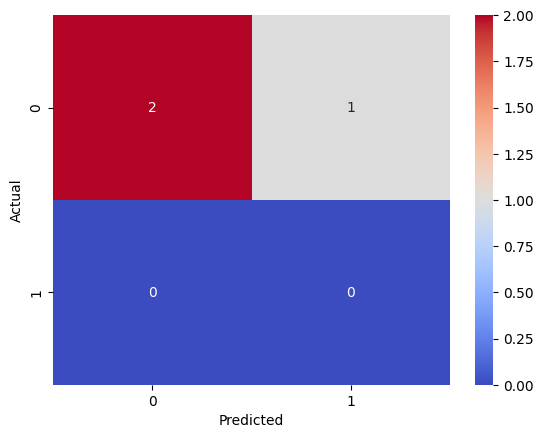

In [12]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(score*100, 2)}%")

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [13]:
def predict_news(news):
    cleaned = clean_text(news)
    vector = tfidf_vectorizer.transform([cleaned])
    prediction = model.predict(vector)
    return "Real" if prediction[0] == 1 else "Fake"

# Test
predict_news("NASA confirms alien life was found on Mars.")


'Real'